### Pakistan COVID-19 forecast using SIRD Model

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request
import re
from scipy.integrate import odeint

In [2]:
def plotCaseRate(plotS = False, plotI = False, plotR = False, plotD=False, start="26-02-2020t00:00", model = ""):
    datetime_col = pd.date_range(start, periods=len(t), freq="D")
    fig = plt.figure(facecolor = 'w', figsize=(11,5))
    ax = fig.add_subplot(111, axisbelow = True)
    # replacing t with datetime_col.date in ax.plot
    if plotS:
        ax.plot(datetime_col.date, S, 'b', alpha=0.5, lw=2, label = "Susceptible")
    if plotI:
        ax.plot(datetime_col.date, I, 'r', alpha=0.5, lw=2, label = "Infected")
    if plotR:
        ax.plot(datetime_col.date, R, 'g', alpha=0.5, lw=2, label = "Recovered")
    if plotD:
        ax.plot(datetime_col.date, D, 'o', alpha=0.5, lw=2, label = "Dead")
    ax.set_xlabel('Time/days')
    ax.set_ylabel('Number of people')
    ax.set_title("Pakistan Forecast using "+ model +" Model")
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which = 'major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

In [3]:
N = 200 * 1000000 # population of Pakistan
I0, R0 = 1,0
S0 = N - I0 - R0
# contact rate - guesstimate start at 0.2,1.0, 0.6
# recovery rate - 2 weeks for 80 % and 3 to 6 weeks for 20 % approx 17 days
beta, gamma = 0.2, 1./17
# Time points in days
t = np.linspace(0,60, 60)

__SIR Model__

In [4]:
def derivSIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

__Model: when Confirmed Case Count was "1"__

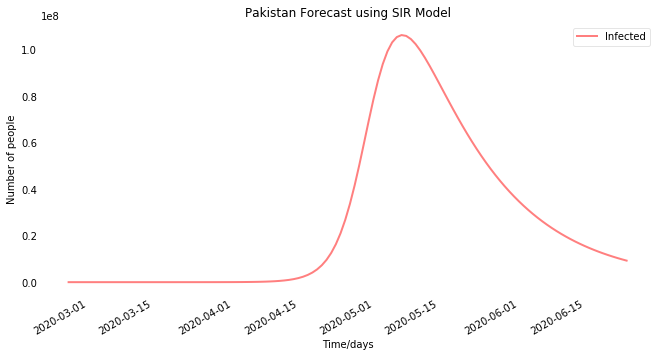

In [5]:
I0, R0 = 1,0
S0 = N - I0 - R0
t = np.linspace(0,120, 120)
beta, gamma = 0.35, 1./17
y0 = S0, I0, R0
ret = odeint(derivSIR, y0, t, args =(N, beta, gamma))
S, I, R = ret.T
plotCaseRate(False, True, False, False, start="26-02-2020t00:00", model = "SIR")

__SIR Model: when confirmed case count was 85264__

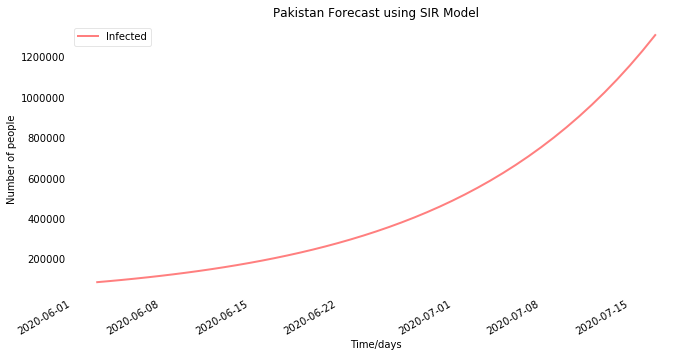

In [6]:
# With stats on 6/21.
# number of recovered guesstimated using 10% for closed and further 50% of that recovered
I0, R0 = 85264,30128
S0 = N - I0 - R0
t = np.linspace(0,45, 45)
beta, gamma = 0.12, 1./17
y0 = S0, I0, R0
ret = odeint(derivSIR, y0, t, args =(N, beta, gamma))
S, I, R = ret.T
plotCaseRate(False, True, False, False, start="06-03-2020t00:00", model = "SIR")

__SIRD MODEL__

In [7]:
def derivSIRD(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

__Model: when Confirmed Case Count was "1"__

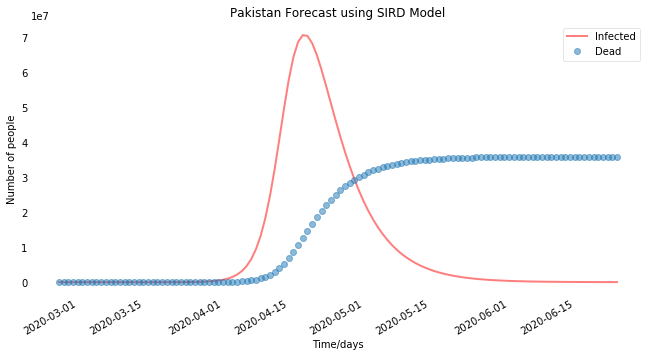

In [8]:
# Adding death numbers to the first model we tried with SIR starting beginning March
# mu estimated at average mrtality after 5 weeks
I0, R0, D0 = 1,0, 0
S0 = N - I0 - R0 - D0
t = np.linspace(0,120, 120)
beta, gamma = 0.535, 0.125
mu = 1./35
y0 = S0, I0, R0, D0
ret = odeint(derivSIRD, y0, t, args =(N, beta, gamma, mu))
S, I, R, D = ret.T
plotCaseRate(False, True, False, True, model = "SIRD")

__SIR Model: when confirmed case count was 85264__

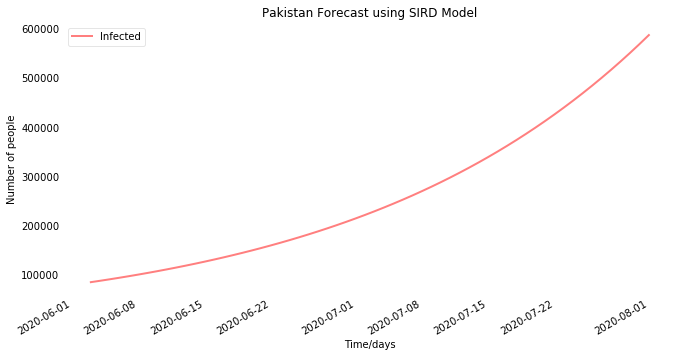

In [9]:
# Adding death numbers to the second model for SIR starting about 6/21
I0, R0, D0 = 85264,30128,1770
#S0 = 621697
S0 = N - I0 - R0 - D0
t = np.linspace(0,60, 60)
beta, gamma = 0.12, 1./17
mu = 1./35
y0 = S0, I0, R0, D0
ret = odeint(derivSIRD, y0, t, args =(N, beta, gamma, mu))
S, I, R, D = ret.T
plotCaseRate(False, True, False, False,start="06-03-2020t00:00", model="SIRD")

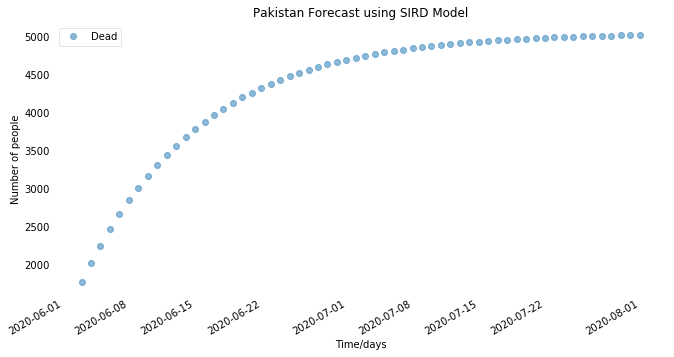

In [10]:
# Adding death numbers to the second model for SIR starting about 3/21
I0, R0, D0 = 85264,30128,1770
#S0 = 621697
S0 = N - I0 - R0 - D0
t = np.linspace(0,60, 60)
beta, gamma = 0.05, 0.125
mu = 0.003
# beta, gamma = 0.005, 0.125
# mu = 0.005
y0 = S0, I0, R0, D0
ret = odeint(derivSIRD, y0, t, args =(N, beta, gamma, mu))
S, I, R, D = ret.T
plotCaseRate(False, False, False, True,start="06-03-2020t00:00", model = "SIRD")

In [11]:
df = pd.DataFrame(I, D)

In [49]:
#df.astype(int)

In [ ]:
# # beta, gamma, mu from reference
# I0, R0, D0 = 85264,30128,1770
# S0 = N - I0 - R0 - D0
# t = np.linspace(0,60, 60)
# beta, gamma = 0.319, 0.16
# mu = 0.0005
# y0 = S0, I0, R0, D0
# ret = odeint(derivSIRD, y0, t, args =(N, beta, gamma, mu))
# S, I, R, D = ret.T
# plotCaseRate(False, True, False,False,start="06-03-2020t00:00")
# plotCaseRate(False, False, False,True,start="06-03-2020t00:00")

In [48]:
# # beta, gamma, mu from reference
# I0, R0, D0 = 85264,30128,1770
# S0 = N - I0 - R0 - D0
# t = np.linspace(0,365, 365)
# beta, gamma = 0.319,0.16
# mu = 0.0005
# y0 = S0, I0, R0, D0
# ret = odeint(derivSIRD, y0, t, args =(N, beta, gamma, mu))
# S, I, R, D = ret.T
# plotCaseRate(True, True, True, True,start="06-03-2020t00:00")